In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:

import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from model import segnet#,fcn8,mobile_unet
import cityscapes_labels
import utils



/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
!nvidia-smi

Mon Jan 29 18:32:21 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 970     Off  | 00000000:01:00.0  On |                  N/A |
| 48%   47C    P2    86W / 250W |   3801MiB /  4034MiB |     57%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
#target_height, target_width = 360, 480
target_height, target_width = 360, 648
labels = cityscapes_labels.labels
n_classes = len(labels)
batch_size = 2
epochs = 10

dataset_path = '/home/xmlyna06/data/gta/'

images_path = os.path.join(dataset_path, 'images/')
labels_path = os.path.join(dataset_path, 'labels/')

# segnet
model = segnet.get_model(target_height, target_width, n_classes)

#model.load_weights('weights/segnet_2018_01_21_18:20.hdf5')
model.load_weights('weights/segnet_2018_01_29_08:09.hdf5')
#model.load_weights('weights/segnet_2018_01_21_15:57.hdf5')

#model.summary()

model.compile(
    loss="categorical_crossentropy",
    optimizer='sgd',
    metrics=["categorical_accuracy"]
)

(0, '/home/xmlyna06/data/gta/images/00001.png')
(1052, 1914, 3)
1/1 [==============================] - 5s 5s/step
(1, '/home/xmlyna06/data/gta/images/22001.png')
(1046, 1914, 3)
1/1 [==============================] - 5s 5s/step
(2, './results/cityscapes_2_img.png')
(1024, 2048, 3)
1/1 [==============================] - 6s 6s/step
(3, './results/exp1_camvid.png')
(720, 960, 3)
1/1 [==============================] - 6s 6s/step
(4, './results/img_aachen_000007_000019_leftImg8bit.png.png')
(1024, 2048, 3)
1/1 [==============================] - 6s 6s/step


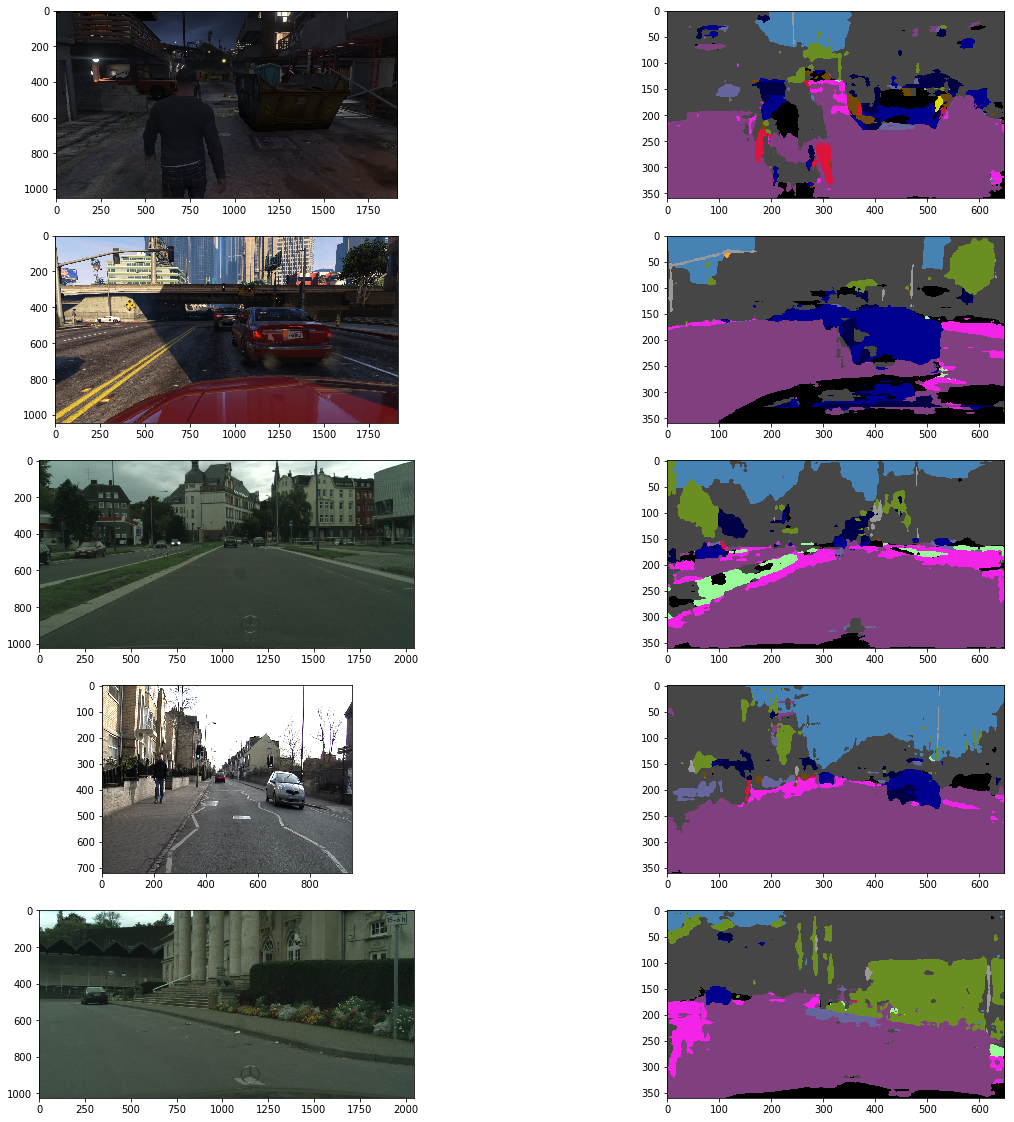

In [6]:
import data_generator
import cityscapes_labels

predict_filenames = [
    images_path + '00001.png',
    images_path + '22001.png',
    './results/cityscapes_2_img.png',
    './results/exp1_camvid.png',
    './results/img_aachen_000007_000019_leftImg8bit.png.png'
]


f, arr= plt.subplots(len(predict_filenames),2)
f.set_size_inches(20,20)

for i, filename in enumerate(predict_filenames):
    print(i, filename)

    image = cv2.imread(filename)

    print(image.shape)

    norm = data_generator.SimpleSegmentationGenerator.normalize(image, (target_height,target_width))

    prediction = model.predict_proba(np.array([norm]), batch_size, verbose=1)

    class_scores = prediction.reshape((target_height, target_width, n_classes))
    class_image = np.argmax(class_scores, axis=2)
    colored_class_image = utils.class_image_to_image(class_image, cityscapes_labels.trainId2label)  # there should be trainid2label

    predicting_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    arr[i][0].imshow(predicting_image)
    arr[i][1].imshow(colored_class_image)

    im_to_save = cv2.cvtColor(colored_class_image, cv2.COLOR_RGB2BGR)

    cv2.imwrite('results/img_'+str(filename.split('/')[-1])+'.png', image)
    cv2.imwrite('results/pred_'+ str(filename.split('/')[-1])+'.png', im_to_save)

(0, '../gta_input.png')
(1052, 1914, 3)
1/1 [==============================] - 6s 6s/step
(1, '../camvid_input.png')
(720, 960, 3)
1/1 [==============================] - 6s 6s/step


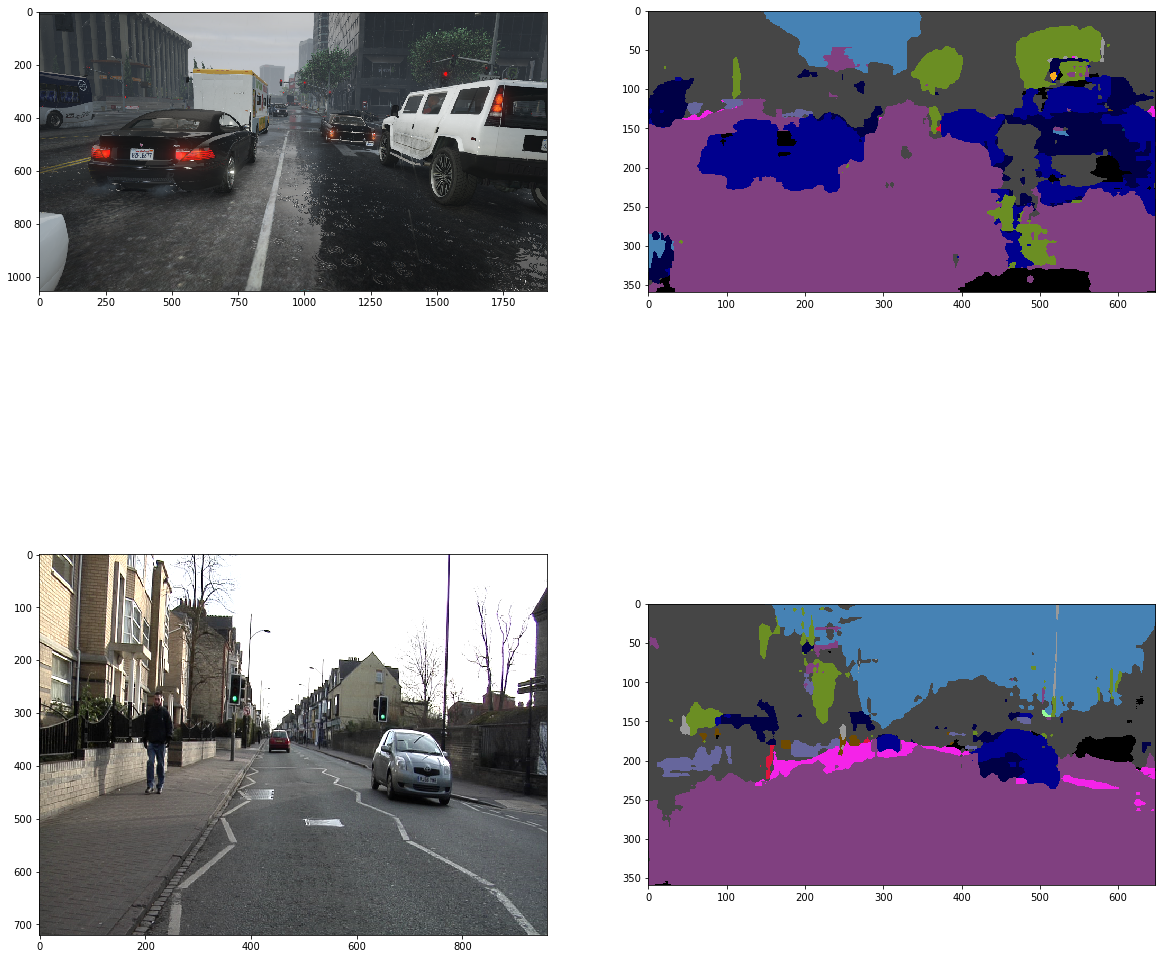

(1052, 1914, 3)
1/1 [==============================] - 9s 9s/step


True

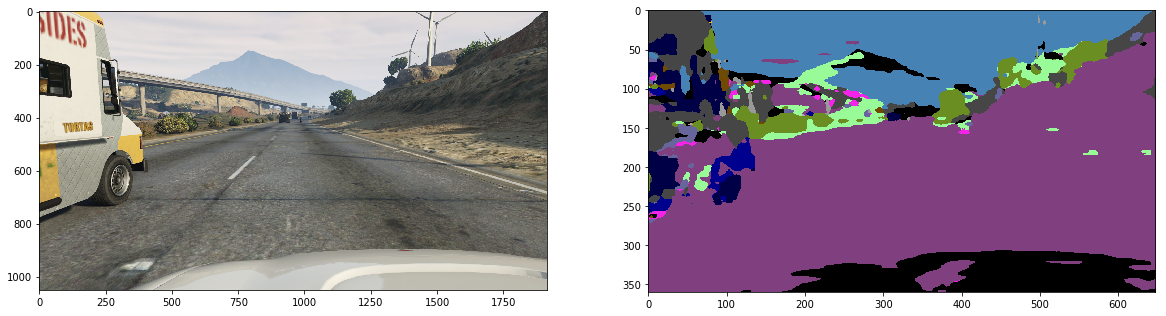

True

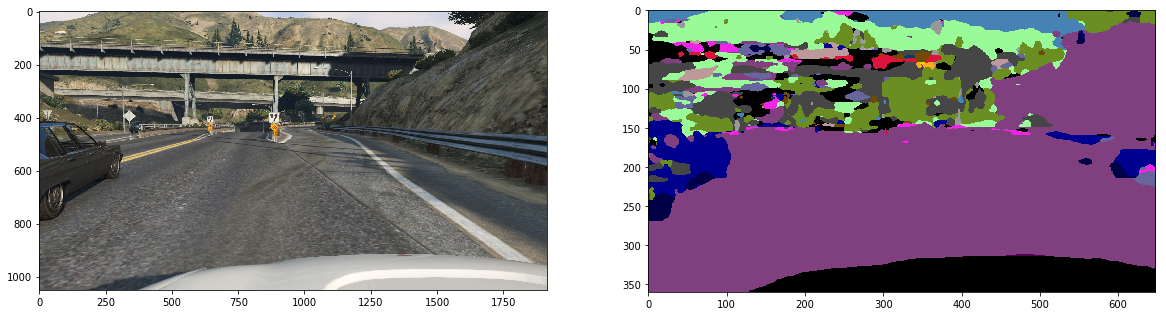

In [44]:
!pwd

/home/xmlyna06/cnn-segmentation/gta_segnet


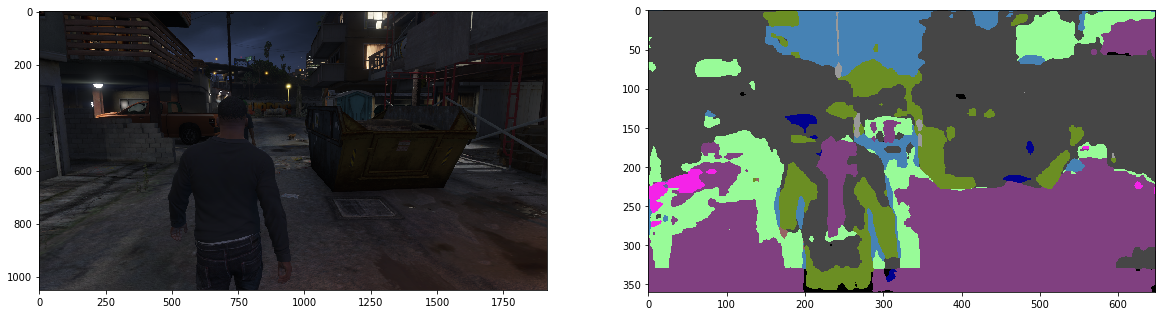